In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the cleaned data after preprocessing.
df = pd.read_csv("C:/Users/KRISHNA/Desktop/SHWETA/Fall 2024/Project/Cleaned_Loan_approval_dataset.csv")

In [4]:
df.head()

,LoanNumber,UserName,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,...,CreditScoreEsMicroL,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan
0,483449,BO965519,Existing_credit_customer,Income_expenses_verified,1,53,Female,EE,2125.0,2125.0,...,M,1000.0,969.16,1187.91,1155.84,433.60,1.0,500.0,590.95,0.0
1,378148,BOA9K172A,Existing_credit_customer,Income_unverified,1,50,Female,EE,3000.0,3000.0,...,M,1000.0,563.59,360.07,2436.41,2291.82,1.0,1800.0,445.26,1.0
2,451831,BO7971663,New_credit_Customer,Income_expenses_verified,1,44,Male,EE,10630.0,9100.0,...,M,1000.0,6537.00,1708.47,0.00,0.00,0.0,0.0,0.00,0.0
3,349381,BO76151K3,New_credit_Customer,Income_verified,6,42,Male,ES,1500.0,1500.0,...,M3,1000.0,464.73,355.92,1035.27,2833.83,0.0,0.0,0.00,1.0
4,443082,BOK423A63,New_credit_Customer,Income_expenses_verified,6,34,Female,ES,1595.0,1090.0,...,M5,1000.0,0.01,0.00,1089.99,4215.37,0.0,0.0,0.00,0.0


In [5]:
# Combining the income from all the sources.
df['TotalIncome'] = (df['IncomeFromPrincipalEmployer'] + df['IncomeFromPension'] + 
                     df['IncomeFromFamilyAllowance'] + df['IncomeFromSocialWelfare'] + 
                     df['IncomeFromLeavePay'] + df['IncomeFromChildSupport'] + 
                     df['IncomeOther']+df['IncomeTotal'])

In [6]:
df.drop(['IncomeFromPrincipalEmployer', 'IncomeFromPension',
       'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
       'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther',
       'IncomeTotal'],axis=1,inplace=True)

In [7]:
# Summing up the liabilities.
df['TotalLiabilities'] = df['LiabilitiesTotal'] + df['ExistingLiabilities'] + df['RefinanceLiabilities']

In [8]:
df.drop([ 'ExistingLiabilities', 'LiabilitiesTotal',
       'RefinanceLiabilities'],axis=1,inplace=True)

In [9]:
df.columns

Index(['LoanNumber', 'UserName', 'NewCreditCustomer', 'VerificationType',
       'LanguageCode', 'Age', 'Gender', 'Country', 'AppliedAmount', 'Amount',
       'Interest', 'LoanDuration', 'MonthlyPayment', 'UseOfLoan', 'Education',
       'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'DebtToIncome', 'FreeCash', 'MonthlyPaymentDay',
       'ExpectedReturn', 'ProbabilityOfDefault', 'Rating', 'Status',
       'Restructured', 'CreditScoreEsMicroL', 'CreditScoreEeMini',
       'PrincipalPaymentsMade', 'InterestAndPenaltyPaymentsMade',
       'PrincipalBalance', 'InterestAndPenaltyBalance',
       'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan',
       'PreviousRepaymentsBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'TotalIncome',
       'TotalLiabilities'],
      dtype='object')

In [10]:
df['ExpectedReturn'].describe()

count    179235.000000
mean          0.130520
std           0.067156
min          -0.798891
25%           0.100773
50%           0.128518
75%           0.150562
max           0.808546
Name: ExpectedReturn, dtype: float64

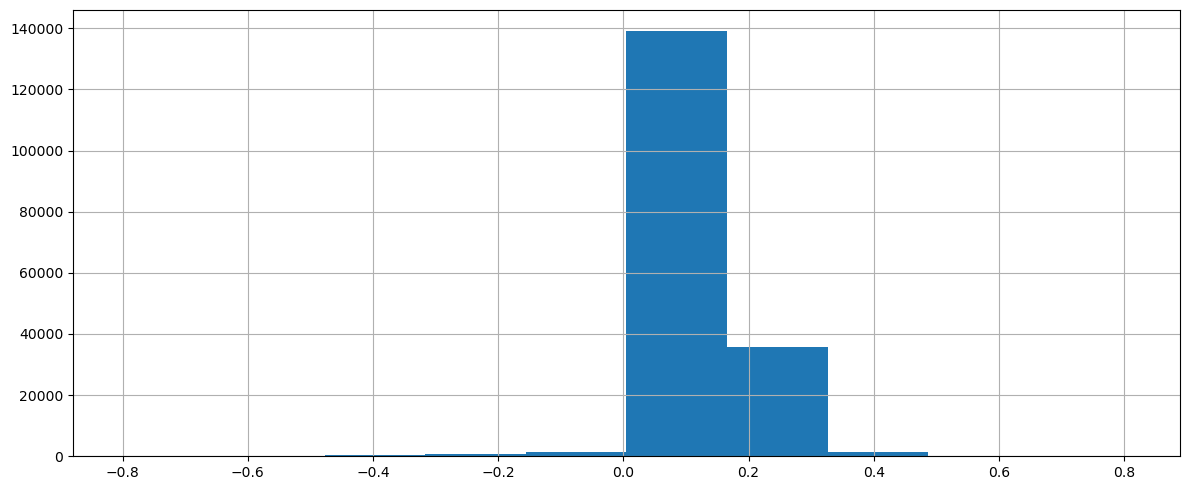

In [11]:
df['ExpectedReturn'].hist(figsize=(12, 5), bins=10)
plt.tight_layout()
plt.show()

In [12]:
# Selecting features for predicting probabilty of default.
exp_return_features = [
    'AppliedAmount', 'Amount','ProbabilityOfDefault',
    'UseOfLoan', 'TotalLiabilities','TotalIncome',
    'DebtToIncome', 'FreeCash', 'ExpectedReturn',
    'NewCreditCustomer', 'CreditScoreEsMicroL', 'CreditScoreEeMini',
    'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan',
    'Age', 'EmploymentStatus', 'EmploymentDurationCurrentEmployer', 'HomeOwnershipType',
    'Rating', 'Restructured'
]
exp_return_df= df[exp_return_features]
exp_return_df.head()

,AppliedAmount,Amount,ProbabilityOfDefault,UseOfLoan,TotalLiabilities,TotalIncome,DebtToIncome,FreeCash,ExpectedReturn,NewCreditCustomer,CreditScoreEsMicroL,CreditScoreEeMini,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,Age,EmploymentStatus,EmploymentDurationCurrentEmployer,HomeOwnershipType,Rating,Restructured
0,2125.0,2125.0,0.122216,Home_improvement,499.09,708.0,26.29,10.92,0.141145,Existing_credit_customer,M,1000.0,1.0,500.0,53,Retiree,0,Owner,C,No
1,3000.0,3000.0,0.036400,Business,740.45,1800.0,30.58,78.80,0.140436,Existing_credit_customer,M,1000.0,1.0,1800.0,50,Entrepreneur,MoreThan5Years,Owner,B,No
2,10630.0,9100.0,0.041300,Business,915.00,2400.0,26.71,349.43,0.113484,New_credit_Customer,M,1000.0,0.0,0.0,44,Entrepreneur,UpTo3Years,Mortgage,A,No
3,1500.0,1500.0,0.188726,Home_improvement,351.00,1726.0,7.36,449.47,0.183229,New_credit_Customer,M3,1000.0,0.0,0.0,42,Fully-Employed,UpTo5Years,Living_with_parents,F,No
4,1595.0,1090.0,0.749511,Other,947.00,1394.0,36.04,95.81,0.115240,New_credit_Customer,M5,1000.0,0.0,0.0,34,Retiree,0,Tenant_pre_furnished_property,HR,No


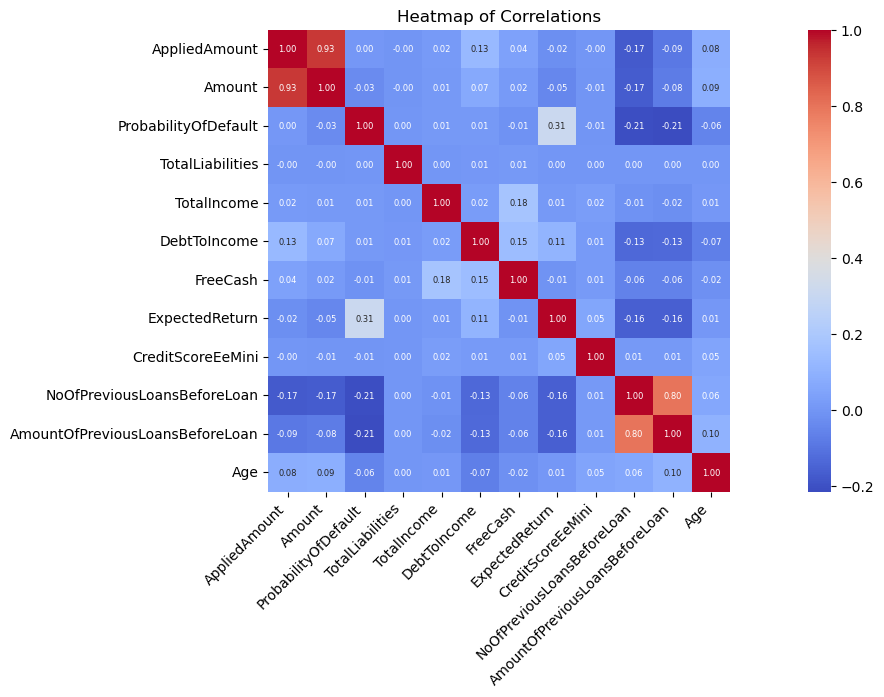

In [13]:
# Analysing the heatmap to find out relationships between the variables.

df1 = exp_return_df.select_dtypes(include=['number'])
# Calculating correlation matrix
correlation_matrix = df1.corr()

# Creating heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 6},fmt=".2f", square=True)
plt.title('Heatmap of Correlations')
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)  
plt.show()

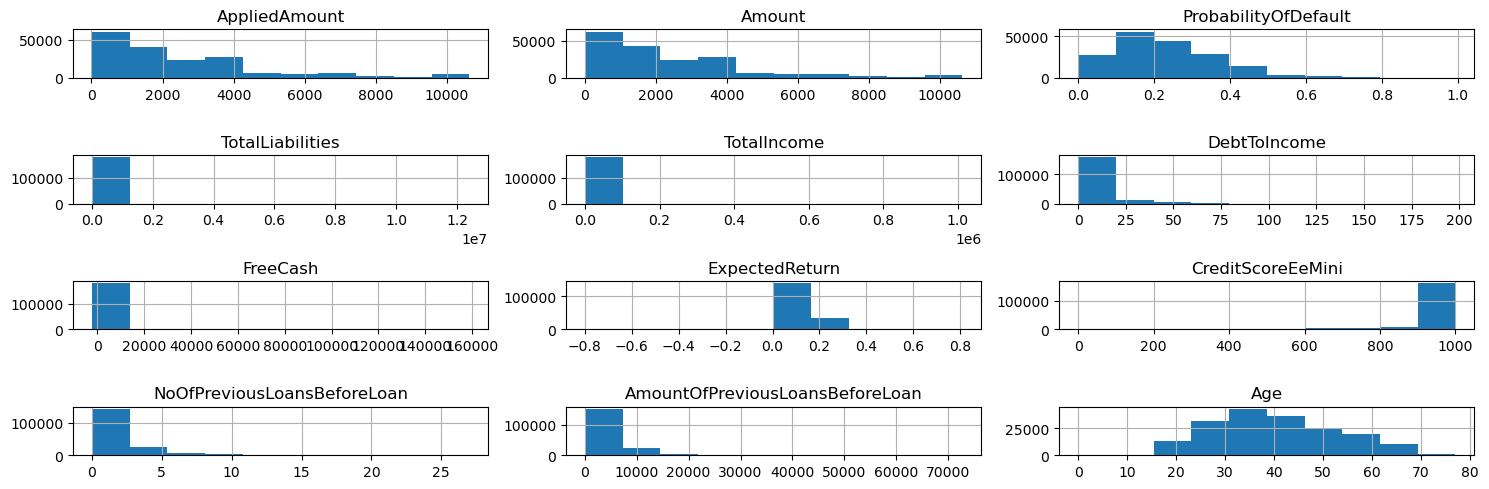

In [14]:
# Plotting histograms for all numerical variables to check the distribution of the variables.
df1.hist(figsize=(15, 5), bins=10)
plt.tight_layout()
plt.show()

In [15]:
# Performing label encoding to convert categorical variables into numeric values.
from sklearn.preprocessing import LabelEncoder

# Initializing the LabelEncoder
label_encoder = LabelEncoder()

# Getting the categorical columns.
categorical_columns = exp_return_df.select_dtypes(include=['object', 'category']).columns.tolist()

# Loop through the categorical columns and apply LabelEncoder
for column in categorical_columns:
    exp_return_df[column] = label_encoder.fit_transform(exp_return_df[column])

C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_23968\739032480.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_return_df[column] = label_encoder.fit_transform(exp_return_df[column])
C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_23968\739032480.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_return_df[column] = label_encoder.fit_transform(exp_return_df[column])
C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_23968\739032480.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy 

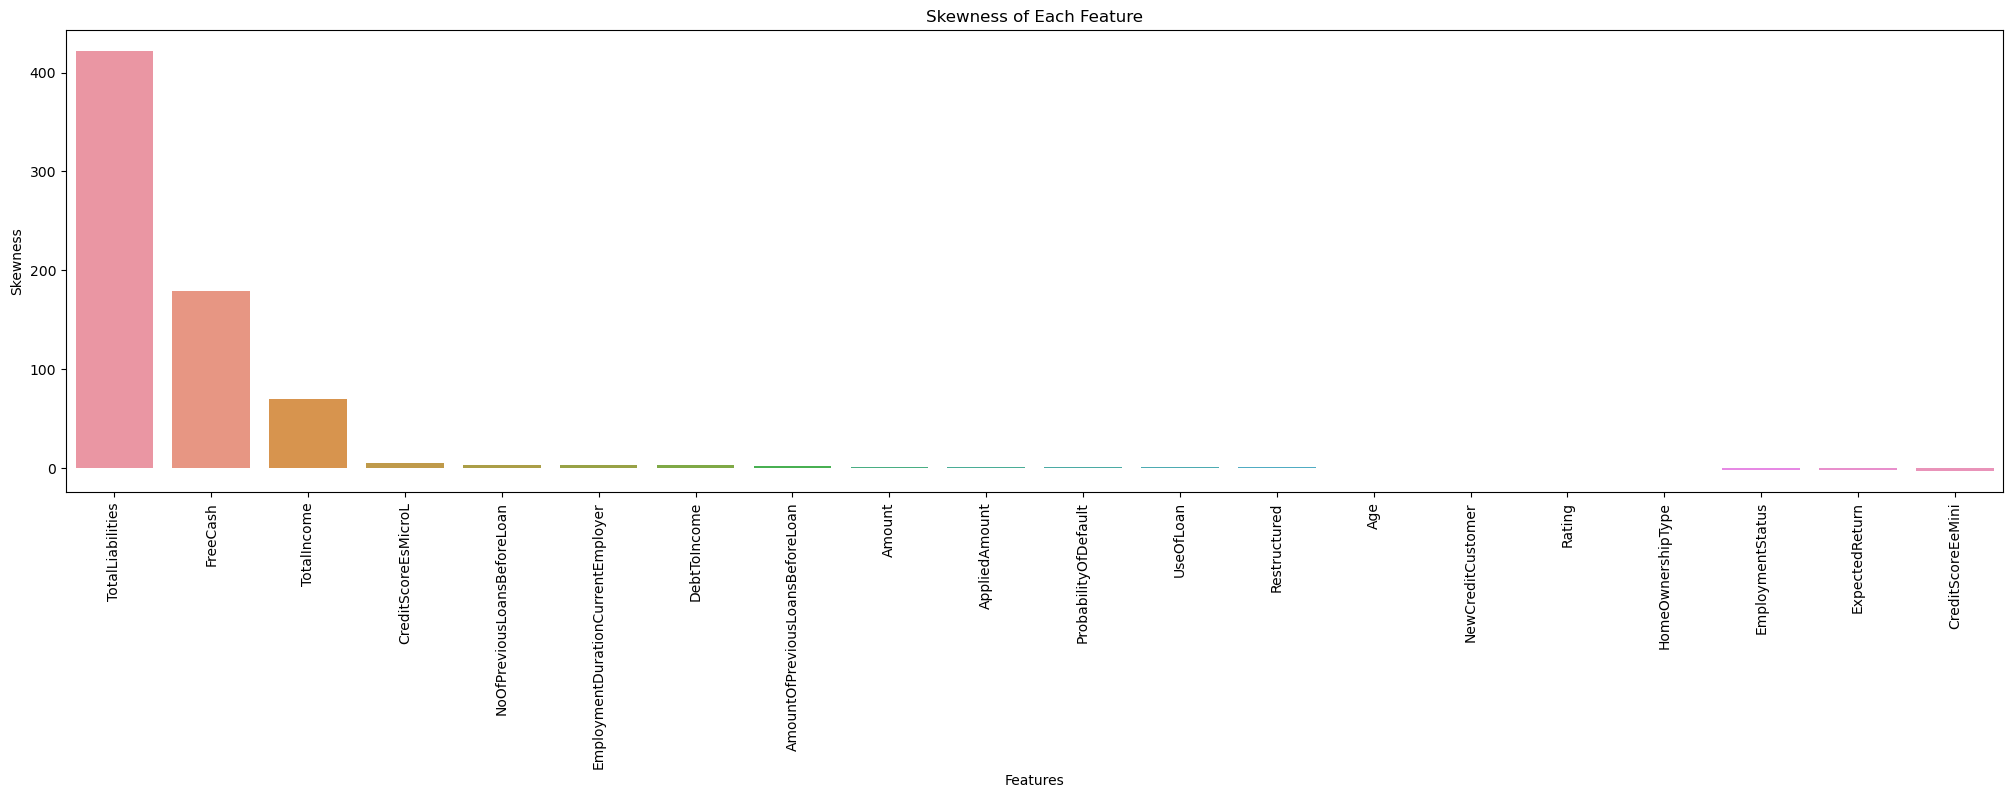

In [16]:
# Checking skewness of all the columns.
skewed_features = exp_return_df.apply(lambda x: x.skew()).sort_values(ascending=False)

# Plotting the skewness values
plt.figure(figsize=(25, 6))
sns.barplot(x=skewed_features.index, y=skewed_features.values)
plt.xticks(rotation=90) 
plt.title('Skewness of Each Feature')
plt.ylabel('Skewness')
plt.xlabel('Features')
plt.show()

In [17]:
# Saving the LabelEncoder object.
import joblib
joblib.dump(label_encoder, 'expreturn_encoder.pkl')

['expreturn_encoder.pkl']

In [18]:
threshold = 2

# Selecting features to transform based on skewness
features_to_transform = skewed_features[skewed_features.abs() > threshold].index.tolist()

# Apply transformations
for column in features_to_transform:
    if skewed_features[column] > 0:
        if (exp_return_df[column] >= 0).all(): 
            exp_return_df[column] = np.log1p(exp_return_df[column])
        else:
            min_value = exp_return_df[column].min()
            exp_return_df[column] = exp_return_df[column] + abs(min_value) + 1 
            exp_return_df[column] = np.log1p(exp_return_df[column])

C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_23968\3804148842.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_return_df[column] = np.log1p(exp_return_df[column])
C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_23968\3804148842.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_return_df[column] = exp_return_df[column] + abs(min_value) + 1
C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_23968\3804148842.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

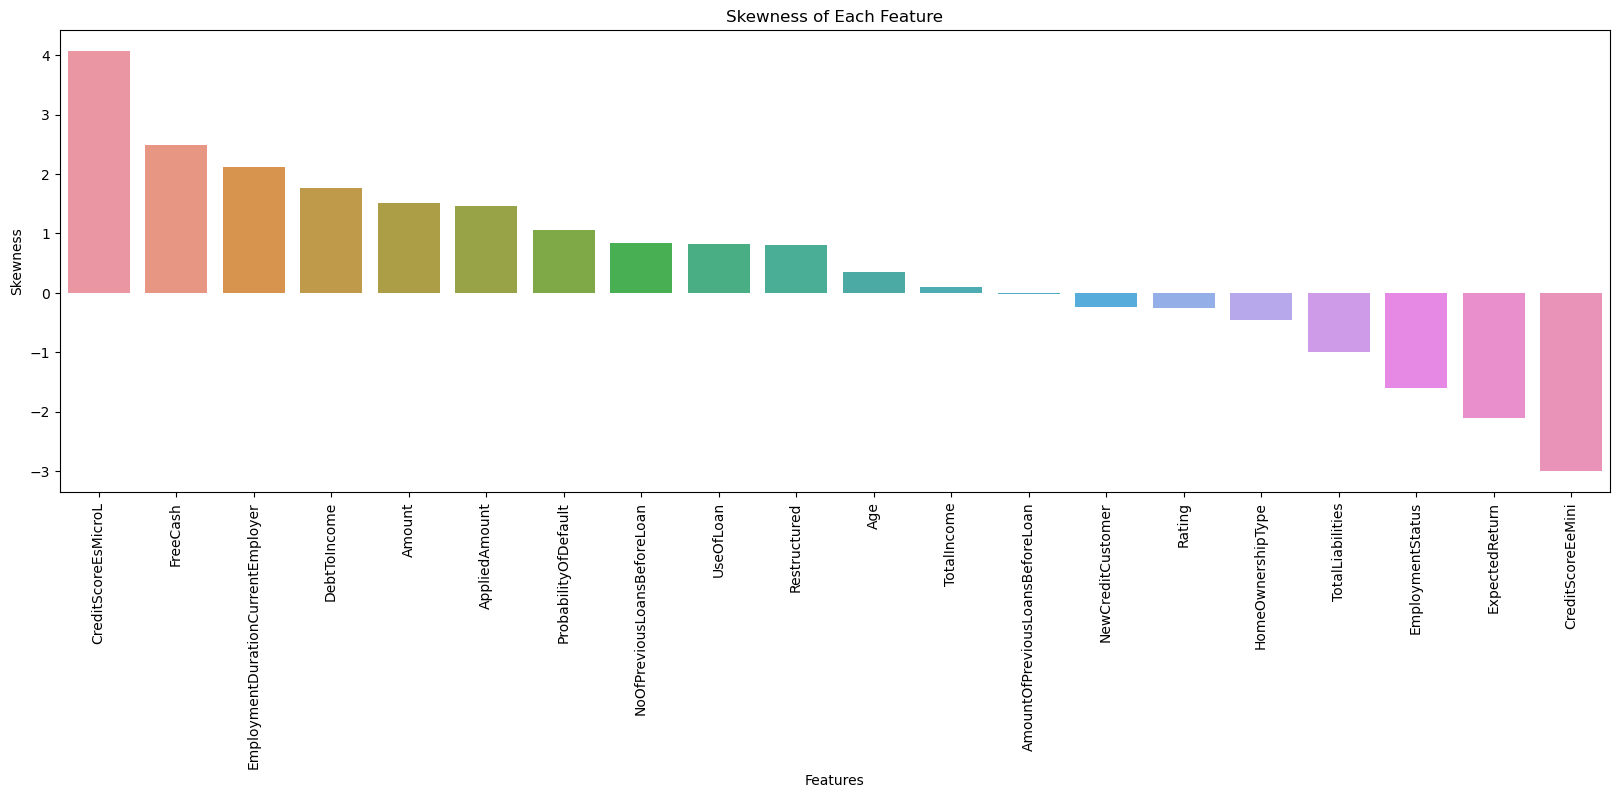

In [19]:
# Checking the skewness of each column after perfroming the transformations.
skewed_features = exp_return_df.apply(lambda x: x.skew()).sort_values(ascending=False)

# Plotting the skewness values.
plt.figure(figsize=(20, 6))
sns.barplot(x=skewed_features.index, y=skewed_features.values)
plt.xticks(rotation=90)  
plt.title('Skewness of Each Feature')
plt.ylabel('Skewness')
plt.xlabel('Features')
plt.show()

In [20]:
# Saving the data.
exp_return_df.to_csv('Cleaned_expected_return_dataset.csv', index=False)

In [21]:
# Performing normalization of data using Robust Scaler.

from sklearn.preprocessing import RobustScaler
X = exp_return_df.drop('ExpectedReturn',axis=1)
scaler = RobustScaler()  
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y = exp_return_df[['ExpectedReturn']] 
y = scaler.fit_transform(y)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


importances = model.feature_importances_

# Creating a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df

C:\Users\KRISHNA\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,Feature,Importance
2,ProbabilityOfDefault,0.243480
17,Rating,0.206254
7,FreeCash,0.141002
9,CreditScoreEsMicroL,0.079113
1,Amount,0.075876
0,AppliedAmount,0.047088
5,TotalIncome,0.041193
6,DebtToIncome,0.039184
4,TotalLiabilities,0.032572
13,Age,0.020622


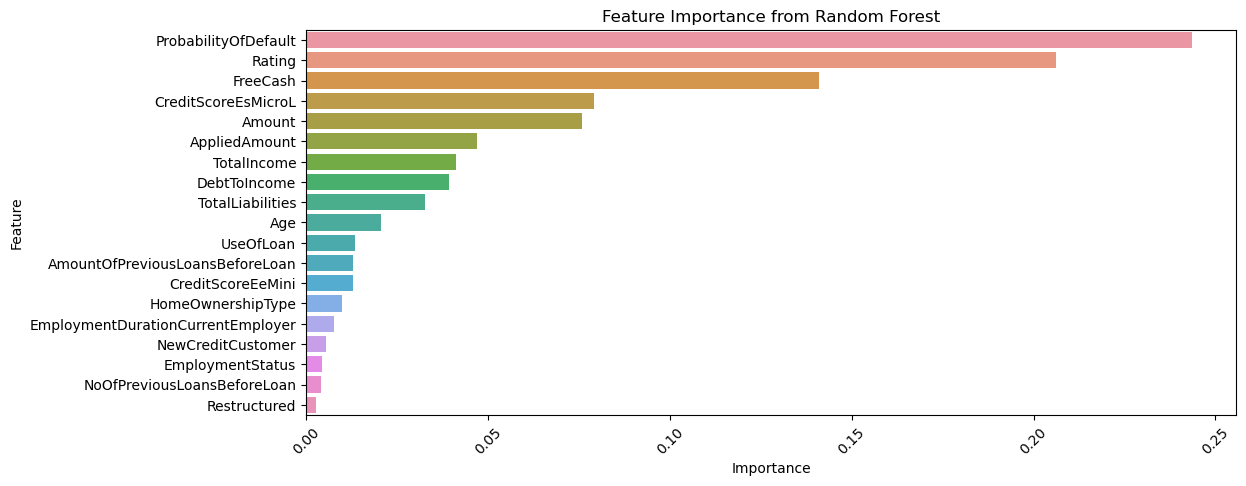

In [23]:
# Plotting the top 20 feature importances.
top_n = 20
top_features = feature_importance_df.head(top_n)
plt.figure(figsize=(12, 5))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Feature Importance from Random Forest')
plt.xticks(rotation=45) 
plt.show()